In [5]:
!pip install pydub

  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


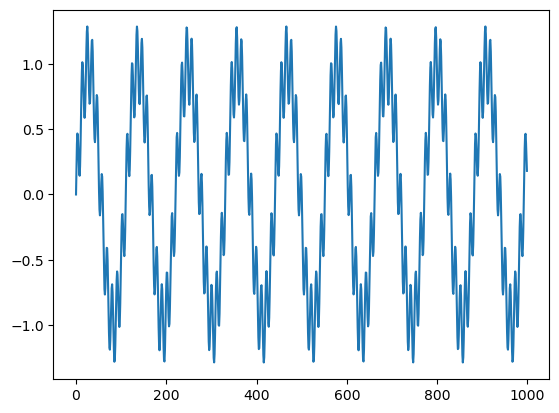

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import write
from pydub import AudioSegment        # to read the voice file
from pydub.playback import play       # to play the voice
from scipy.fft import fft, fftfreq


SAMPLE_RATE = 44100  # Hertz
DURATION = 5         # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    
    y = np.sin((2*np.pi) * frequencies)
    return x, y

_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

mixed_tone = nice_tone + noise_tone*0.3

plt.plot(mixed_tone[:1000])

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)


write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

In [8]:
## read and play whale's voice
song = AudioSegment.from_wav("mysinewave.wav")
#song -= 100  # lower the volume
#song -= 5
song

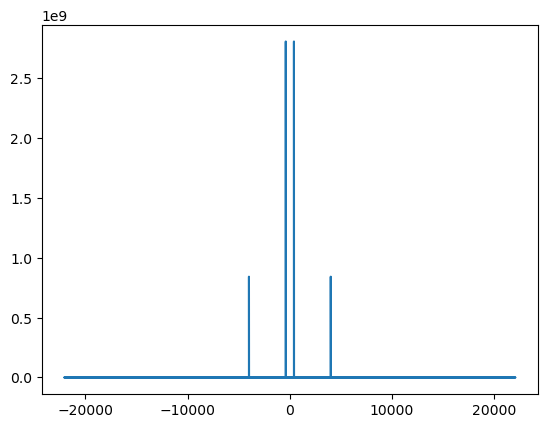

In [10]:
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

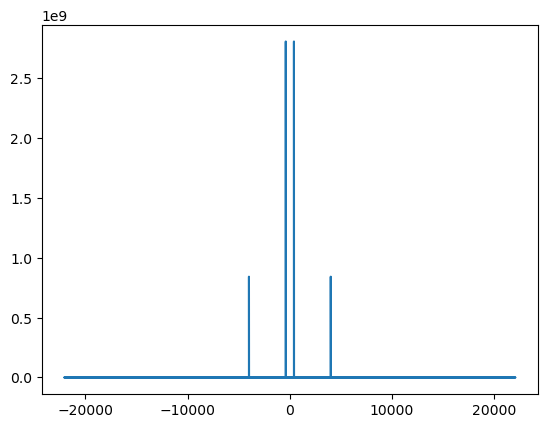

In [11]:
plt.plot(xf, np.abs(yf))
plt.show()

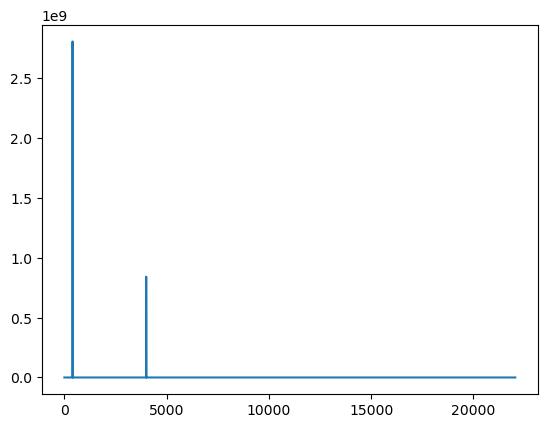

In [12]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

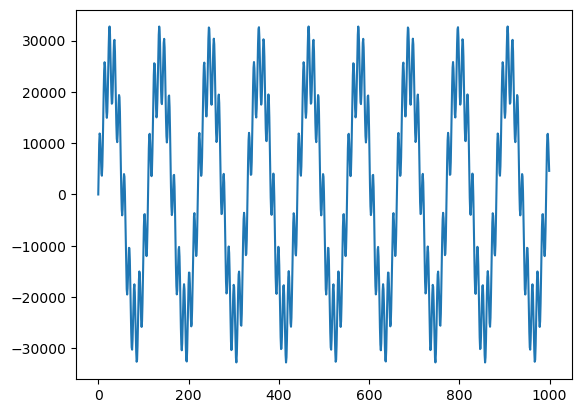

In [13]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()